# Generating Random Networks
## 1-3 Create a modified preferential attachment model that penalizes the age of a node



### (a) Each time a new vertex is added, it creates m links to old vertices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age. In particular, the probability that a newly added vertex connects to an old vertex is proportional to:  
$P[i] ∼ (ck_i^α + a)(dl_i^β + b)$
### where $k_i$ is the degree of vertex $i$ in the current time step, and $l_i$ is the age of vertex $i$. Produce such an undirected network with 1000 nodes and parameters m = 1, α=1,β=−1,and a=c=d=1,b=0. Plot the degree distribution. What is the power law exponent?

In [10]:
library(igraph)
library(ggplot2)

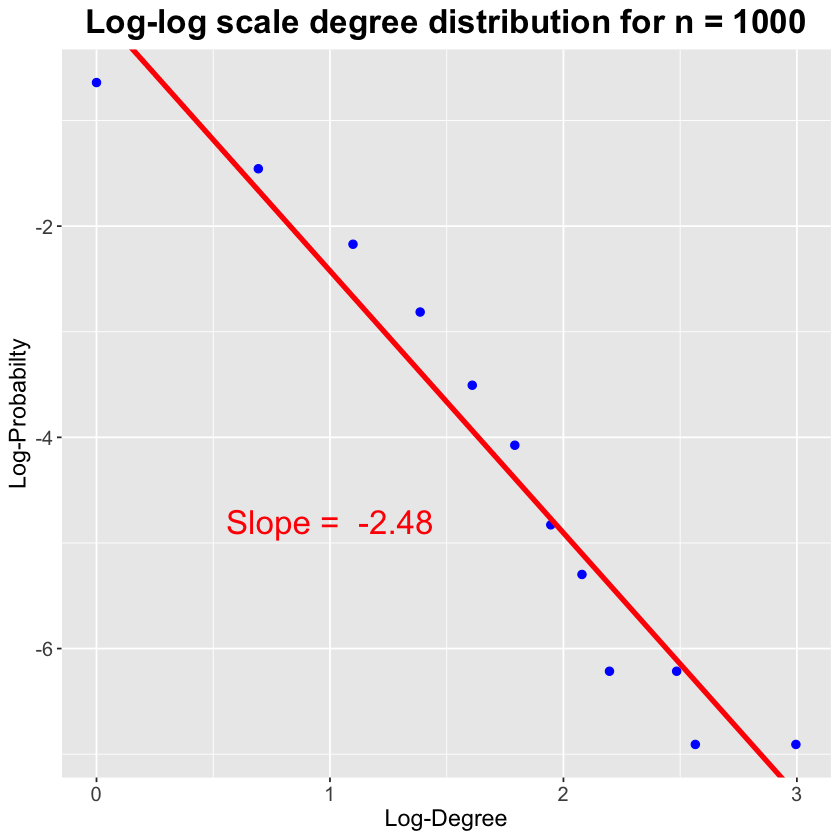

In [42]:
n = 1000
m = 1
alpha = 1
beta = -1
a = c = d = 1
b = 0
directed = FALSE
g = sample_pa_age(n = n,
                  m = m,
                  pa.exp = alpha,
                  aging.exp = beta,
                  zero.deg.appeal = a,
                  zero.age.appeal = b,
                  deg.coef = c,
                  age.coef = d,
                  directed = directed)

data = degree_distribution(g)[-1]
data[data == 0] = NA
data = data.frame(degree = log(seq(1, length(data))),
                  prob = log(data))
data = na.exclude(data)

# linear regression
line = lm(data$prob ~ data$degree)
slope = coef(line)[["data$degree"]]
intercept = coef(line)[["(Intercept)"]]

# plot
ggplot(data, aes(x = degree, y = prob)) +
  geom_point(col = "blue", size = 2) +
  geom_abline(slope = slope,
              intercept = intercept,
              size = 1.5,
              col = "red") +
  annotate("text", x = 1, y = -4.8, color = "red", size = 7,
                   label = paste("Slope = ", round(slope, digits = 2))) +
  xlab("Log-Degree") +
  ylab("Log-Probabilty") +
  ggtitle("Log-log scale degree distribution for n = 1000") +
  theme(plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 14),
        axis.text = element_text(size = 12))

### (b) Use fast greedy method to find the community structure. What is the modularity?

[1] "Modularity for n = 1000:  0.935545"

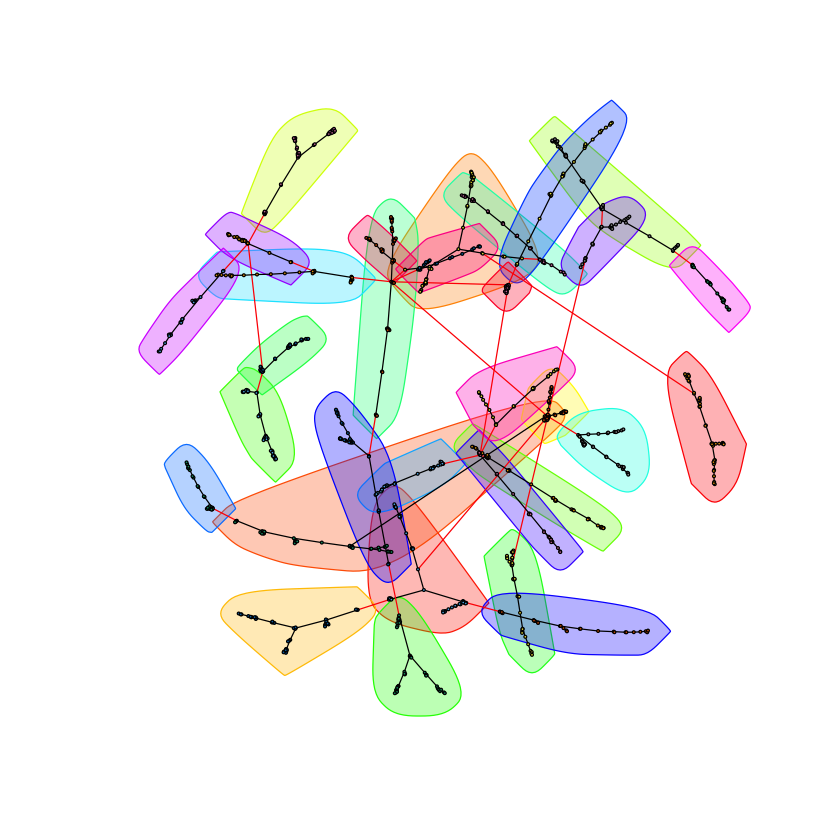

In [43]:
fc = cluster_fast_greedy(graph = g)
plot(fc, g, vertex.size = 1, vertex.label=NA)
sprintf("Modularity for n = 1000:  %.6f", modularity(fc))